In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', index_col='Strand shift')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 7, saw 5


In [4]:
df = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df

,Jaccard index,Proportion,per 10M reads for 100Mbp len,per control
Strand shift,,,,
-500,0.002939,0.000465,0.024651,1.084290
-499,0.002954,0.000467,0.024779,1.089910
-498,0.002966,0.000469,0.024880,1.094350
-497,0.002941,0.000465,0.024668,1.085060
-496,0.002967,0.000469,0.024890,1.094820
...,...,...,...,...
975000,0.002696,0.000426,0.022613,0.994637
980000,0.002697,0.000427,0.022623,0.995069
985000,0.002692,0.000426,0.022583,0.993328


In [3]:
# per control 列だけを抜き出す
pc = df.iloc[:,3]
pc

Strand shift
-500       1.084290
-499       1.089910
-498       1.094350
-497       1.085060
-496       1.094820
             ...   
 975000    0.994637
 980000    0.995069
 985000    0.993328
 990000    1.000340
 995000    1.000070
Name: per control, Length: 2199, dtype: float64

In [4]:
# 列名で指定してもよい
pc = df["per control"]
pc

Strand shift
-500       1.084290
-499       1.089910
-498       1.094350
-497       1.085060
-496       1.094820
             ...   
 975000    0.994637
 980000    0.995069
 985000    0.993328
 990000    1.000340
 995000    1.000070
Name: per control, Length: 2199, dtype: float64

In [5]:
# 最もシンプルな可視化（x軸：index, y軸: per control）
plt.plot(pc)

NameError: name 'pc' is not defined

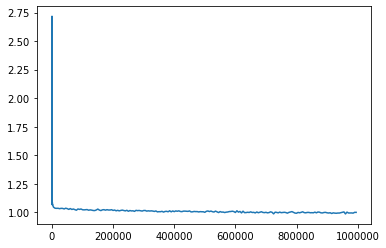

In [7]:
# これでも同じ
plt.plot(pc.index, pc)

## Strand shift 0~ 500 bpまでを可視化したい

In [8]:
pc[500:1001]

Strand shift
0      1.12983
1      1.13697
2      1.15139
3      1.17770
4      1.17967
        ...   
496    1.10159
497    1.10175
498    1.09849
499    1.10400
500    1.10241
Name: per control, Length: 501, dtype: float64

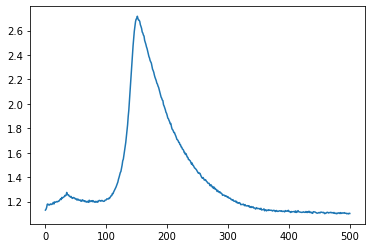

In [9]:
plt.plot(pc[500:1001])

(0, 500)

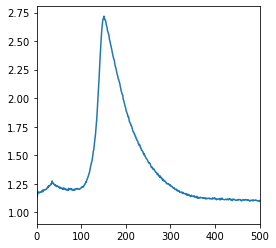

In [10]:
# pltオブジェクトで結果を操作
plt.figure(figsize=(4,4))
plt.plot(pc)
plt.xlim(0,500)

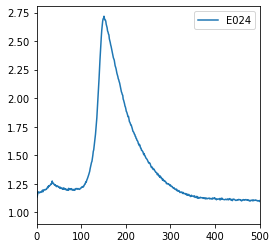

In [11]:
# legendをつけてみる
plt.figure(figsize=(4,4))
plt.plot(pc, label="E024")
plt.xlim(0,500)
plt.legend(loc='upper right')

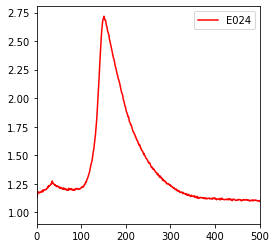

In [13]:
# 線の色を変えてみる
plt.figure(figsize=(4,4))
plt.plot(pc, label="E024", color="red")
plt.xlim(0,500)
plt.legend(loc='upper right')

In [6]:
# 3サンプルを重ねて可視化
df1 = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df2 = pd.read_csv("20201009_nakato_sampledata/E058-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df3 = pd.read_csv("20201009_nakato_sampledata/E096-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')

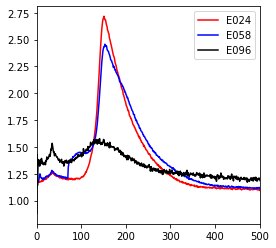

In [17]:
plt.figure(figsize=(4,4))
plt.plot(df1["per control"], label="E024", color="red")
plt.plot(df2["per control"], label="E058", color="blue")
plt.plot(df3["per control"], label="E096", color="black")
plt.xlim(0,500)
plt.legend(loc='upper right')

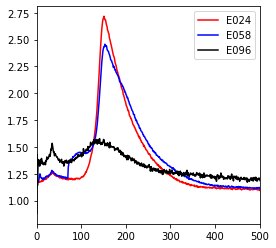

In [7]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.legend(loc='upper right')
plt.savefig("Sample.Jaccard.0-500.pdf")

## お題

In [44]:
# お題１：
# 上の３サンプルの図について、y軸のスケールを0から4にして表示する。

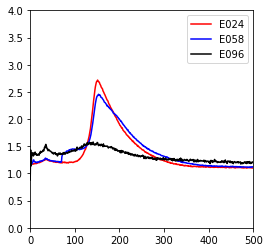

In [9]:
# お題１：y軸のスケールを指定。
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.ylim(0,4)
plt.legend(loc='upper right')

In [42]:
# お題２：
# 上の３サンプルの図について、x軸を対数軸にし、0から1000000まで表示してみる。

/Users/york/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


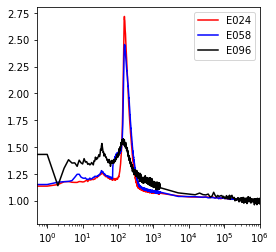

In [11]:
# お題2：x軸のスケールを対数に指定。
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xscale("log")
plt.xlim(0,1000000)
plt.legend(loc='upper right')

In [ ]:
# お題３：
# 上の３サンプルの図について、３サンプルの「平均値」を持ったデータを作成し、上の図に追加で表示。（色は何色でもよい）

In [ ]:
# お題４：
# Jaccard index の列について、同じ３サンプルの図を作る。
# 更に、「per control」の図と合わせて、「per control」「Jaccard index」の２つの図を横に並べて表示させる。
# その図を "rinkou_1009_<yourname>.pdf" という名前でローカルに保存する。

In [ ]:
# お題５：
# 任意の３つのサンプルを入力にとり、３サンプルを重ねた「per control」の図をpdfとして出力するPythonスクリプトを作成する。
# その際、前回用いたサンプルファイル、もしくは自分が作成したスクリプトを改良するかたちで行うこと。
# 出力例はtestdata ディレクトリに含まれるサンプルのうち３つを利用する。出力される図はlegendが適切に入るようにすること。

In [ ]:
# 発展課題（余裕があれば）
# testdata ディレクトリに含まれる全てのサンプルについて、１サンプルずつ per control(0~500 bp) のpdfを出力する
# Pythonスクリプト or シェルスクリプトを作成する。

今回のペア
- 王　ー　堺谷（＆西條）
- 仲嶋　ー　横田
- 牧野　ー　大庭

事前のディスカッションは特に必要ない。最低限pull request -> merge後のディスカッションのみでOK。（もちろん希望あれば多く議論することは良いこと）